** Question: 1**
Generation of ROC curves for 3 models and comparing thier efficiency to assess
fake news

## Downloading all the libraries ##

In [1]:
#Following avoids a warning for KMeans
%env OMP_NUM_THREADS=2

import warnings
warnings.filterwarnings('ignore')

# Standard libraries we always include
%matplotlib inline
import matplotlib.pyplot as plt
from IPython.display import display
import numpy as np
import pandas as pd
import seaborn as sns; sns.set(style="ticks", color_codes=True)


env: OMP_NUM_THREADS=2


## Uploading the files ##

In [4]:
# uploading file via google colab
from google.colab import files
uploaded_1 = files.upload()
uploaded_2 = files.upload()

Saving True.csv to True.csv


Saving Fake.csv to Fake.csv


In [6]:
import io
df1 = pd.read_csv(io.BytesIO(uploaded_1['True.csv']))
df2 = pd.read_csv(io.BytesIO(uploaded_2['Fake.csv']))

In [7]:
#df1 = pd.read_csv('/Users/mukulsherekar/Documents/Applied_Machine_Learning/True.csv')
#df2 = pd.read_csv('/Users/mukulsherekar/Documents/Applied_Machine_Learning/Fake.csv')



## Pre-processing the data ##

In [8]:
# Adding labels to the two datasets
df1['class'] = 0
df2['class'] = 1

In [9]:
df1.head()

,title,text,subject,date,class
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",0
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",0
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",0
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",0
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",0


In [10]:
df2.head()

,title,text,subject,date,class
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",1
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",1
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",1
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",1
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",1


In [11]:
# will use this data-frame for making copying and manipulating the dataframes
df3 = pd.concat([df1, df2])

In [12]:
df3.head()

,title,text,subject,date,class
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",0
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",0
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",0
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",0
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",0


In [13]:
# Extracting importance of each word in the title
# Vectorization creates features (columns). Each feature represents a word in 
# all of titles. Only important words are chosen (preposiiton, definitives etc)
# are ignored. Then, each row of title is given 0/1 if a word is present in 
# that particular title

from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words='english', max_features=50 )
vec_title = vectorizer.fit_transform(df3['title'])

# converting the vectorizer object into a array so that it can be added
# to dataframe
vec_title.toarray()

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.71920917, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [14]:
# converting the vec_title(vectorized object) into a dataframe
df_title = pd.DataFrame(vec_title.toarray(), columns = vectorizer.get_feature_names_out())
df_title.head()

,america,anti,attack,black,breaking,calls,campaign,china,clinton,cnn,...,senate,state,syria,tax,trump,tweets,video,vote,watch,white
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [15]:
df4 = df3.copy()
df4.head()


,title,text,subject,date,class
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",0
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",0
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",0
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",0
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",0


In [16]:
df4.drop(columns=['text', 'subject', 'date'])

,title,class
0,"As U.S. budget fight looms, Republicans flip t...",0
1,U.S. military to accept transgender recruits o...,0
2,Senior U.S. Republican senator: 'Let Mr. Muell...,0
3,FBI Russia probe helped by Australian diplomat...,0
4,Trump wants Postal Service to charge 'much mor...,0
...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,1
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,1
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,1
23479,How to Blow $700 Million: Al Jazeera America F...,1


In [17]:
# resetting 
df4.reset_index(drop=True, inplace=True)
len(df4)

44898

In [18]:
# adding feature dataframe(vectorized) to trimmed original dataframe
df = pd.concat([df4, df_title], axis=1)
df.head()
# end of pre-processing and ready for training and testing

,title,text,subject,date,class,america,anti,attack,black,breaking,...,senate,state,syria,tax,trump,tweets,video,vote,watch,white
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [19]:
# setting up X and Y
X = df.loc[:, 'america':].values
y = df.loc[:, 'class'].values


In [20]:
# splitting up for training and testing
# check on stratification
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = \
    train_test_split(X, y, 
                     test_size=0.20,
                     stratify=y,
                     random_state=1)

** As per the question, three classifiers will be used:

Decision Tree, Random Forest, Neural Network

In [21]:
# Combining transformers and estimators in a pipeline

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression


**DECISION TREE**

In [22]:
# Decision Tree Pipeline
# Two decisiion tree classifiers
# One will have a random state of 1 & max depth of 2
# Other will have random state of 1 and max depth of 4

pipe1_dt = make_pipeline(StandardScaler(),
                        PCA(n_components=2),
                        DecisionTreeClassifier(random_state=1, max_depth=2))
pipe1_dt.fit(X_train, y_train)
y_pred1 = pipe1_dt.predict(X_test)
print('Test Accuracy: %.3f' % pipe1_dt.score(X_test, y_test))

Test Accuracy: 0.758


In [23]:

pipe2_dt = make_pipeline(StandardScaler(),
                        PCA(n_components=2),
                        DecisionTreeClassifier(random_state=1, max_depth=4))
pipe2_dt.fit(X_train, y_train)
y_pred2 = pipe2_dt.predict(X_test)
print('Test Accuracy: %.3f' % pipe2_dt.score(X_test, y_test))

Test Accuracy: 0.767


In [24]:
# K-fold stratification for Decision Tree-1
import numpy as np
from sklearn.model_selection import StratifiedKFold
    

kfold = StratifiedKFold(n_splits=10).split(X_train, y_train)

scores = []
for k, (train, test) in enumerate(kfold):
    pipe1_dt.fit(X_train[train], y_train[train])
    score = pipe1_dt.score(X_train[test], y_train[test])
    scores.append(score)
    #print('Fold: %2d, Class dist.: %s, Acc: %.3f' % (k+1,
          #np.bincount(y_train[train]), score))
    
print('\nCV accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))


CV accuracy: 0.778 +/- 0.010


In [25]:
# K-fold stratification for Decision Tree-2
import numpy as np
from sklearn.model_selection import StratifiedKFold
    

kfold = StratifiedKFold(n_splits=10).split(X_train, y_train)

scores = []
for k, (train, test) in enumerate(kfold):
    pipe2_dt.fit(X_train[train], y_train[train])
    score = pipe2_dt.score(X_train[test], y_train[test])
    scores.append(score)
    #print('Fold: %2d, Class dist.: %s, Acc: %.3f' % (k+1,
          #np.bincount(y_train[train]), score))
    
print('\nCV accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))


CV accuracy: 0.779 +/- 0.009


In [26]:
from sklearn.model_selection import cross_val_score

scores1 = cross_val_score(estimator=pipe1_dt,
                         X=X_train,
                         y=y_train,
                         cv=10,
                         n_jobs=1)

scores2 = cross_val_score(estimator=pipe1_dt,
                         X=X_train,
                         y=y_train,
                         cv=10,
                         n_jobs=1)
#print('CV accuracy scores: %s' % scores1)
print('Cross Validation accuracy for 1st decistion tree: %.3f +/- %.3f' % (np.mean(scores1), np.std(scores1)))
#print('CV accuracy scores: %s' % scores2)
print('Cross Validation accuracy for 2nd decistion tree: %.3f +/- %.3f' % (np.mean(scores2), np.std(scores2)))

Cross Validation accuracy for 1st decistion tree: 0.780 +/- 0.009
Cross Validation accuracy for 2nd decistion tree: 0.779 +/- 0.011


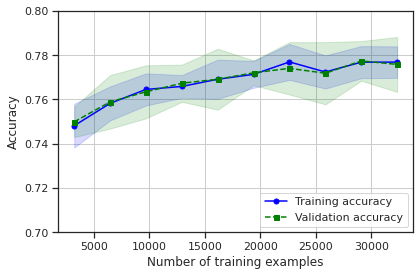

In [27]:
# accuracy plots for Decision Tree-1
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores =\
                learning_curve(estimator=pipe1_dt,
                               X=X_train,
                               y=y_train,
                               train_sizes=np.linspace(0.1, 1.0, 10),
                               cv=10,
                               n_jobs=1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean,
         color='blue', marker='o',
         markersize=5, label='Training accuracy')

plt.fill_between(train_sizes,
                 train_mean + train_std,
                 train_mean - train_std,
                 alpha=0.15, color='blue')

plt.plot(train_sizes, test_mean,
         color='green', linestyle='--',
         marker='s', markersize=5,
         label='Validation accuracy')

plt.fill_between(train_sizes,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.15, color='green')

plt.grid()
plt.xlabel('Number of training examples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.7, 0.8])
plt.tight_layout()
plt.show()

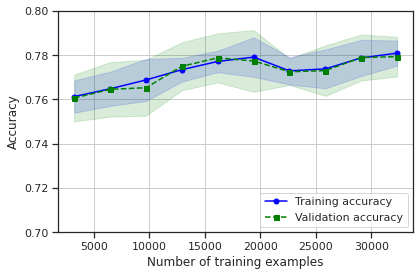

In [28]:
# accuracy plots for Decision Tree-2

train_sizes, train_scores, test_scores =\
                learning_curve(estimator=pipe2_dt,
                               X=X_train,
                               y=y_train,
                               train_sizes=np.linspace(0.1, 1.0, 10),
                               cv=10,
                               n_jobs=1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean,
         color='blue', marker='o',
         markersize=5, label='Training accuracy')

plt.fill_between(train_sizes,
                 train_mean + train_std,
                 train_mean - train_std,
                 alpha=0.15, color='blue')

plt.plot(train_sizes, test_mean,
         color='green', linestyle='--',
         marker='s', markersize=5,
         label='Validation accuracy')

plt.fill_between(train_sizes,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.15, color='green')

plt.grid()
plt.xlabel('Number of training examples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.7, 0.8])
plt.tight_layout()
plt.show()

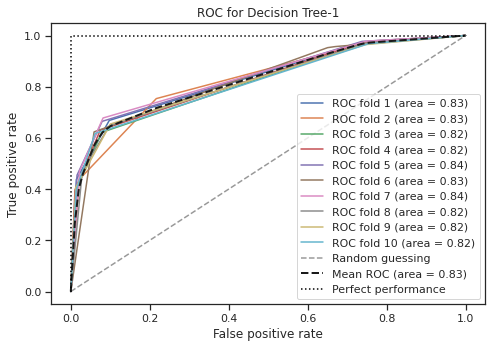

In [29]:
# ROC for Decision Tree-1
from sklearn.metrics import roc_curve, auc
from distutils.version import LooseVersion as Version
from scipy import __version__ as scipy_version


if scipy_version >= Version('1.4.1'):
    from numpy import interp
else:
    from scipy import interp


cv = list(StratifiedKFold(n_splits=10).split(X_train, y_train))

fig = plt.figure(figsize=(7, 5))

mean_tpr = 0.0
mean_fpr = np.linspace(0, 1, 100)
all_tpr = []

for i, (train, test) in enumerate(cv):
    probas = pipe1_dt.fit(X_train[train],
                         y_train[train]).predict_proba(X_train[test])

    fpr, tpr, thresholds = roc_curve(y_train[test],
                                     probas[:, 1],
                                     pos_label=1)
    mean_tpr += interp(mean_fpr, fpr, tpr)
    mean_tpr[0] = 0.0
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr,
             tpr,
             label='ROC fold %d (area = %0.2f)'
                   % (i+1, roc_auc))

plt.plot([0, 1],
         [0, 1],
         linestyle='--',
         color=(0.6, 0.6, 0.6),
         label='Random guessing')

mean_tpr /= len(cv)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, 'k--',
         label='Mean ROC (area = %0.2f)' % mean_auc, lw=2)
plt.plot([0, 0, 1],
         [0, 1, 1],
         linestyle=':',
         color='black',
         label='Perfect performance')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend(loc="lower right")
plt.title("ROC for Decision Tree-1")

plt.tight_layout()
# plt.savefig('images/06_10.png', dpi=300)
plt.show()

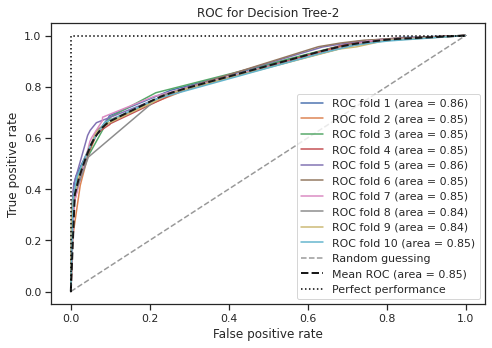

In [30]:
# ROC for Decision Tree-2
from sklearn.metrics import roc_curve, auc
from distutils.version import LooseVersion as Version
from scipy import __version__ as scipy_version


if scipy_version >= Version('1.4.1'):
    from numpy import interp
else:
    from scipy import interp
    

cv = list(StratifiedKFold(n_splits=10).split(X_train, y_train))

fig = plt.figure(figsize=(7, 5))

mean_tpr = 0.0
mean_fpr = np.linspace(0, 1, 100)
all_tpr = []

for i, (train, test) in enumerate(cv):
    probas = pipe2_dt.fit(X_train[train],
                         y_train[train]).predict_proba(X_train[test])

    fpr, tpr, thresholds = roc_curve(y_train[test],
                                     probas[:, 1],
                                     pos_label=1)
    mean_tpr += interp(mean_fpr, fpr, tpr)
    mean_tpr[0] = 0.0
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr,
             tpr,
             label='ROC fold %d (area = %0.2f)'
                   % (i+1, roc_auc))

plt.plot([0, 1],
         [0, 1],
         linestyle='--',
         color=(0.6, 0.6, 0.6),
         label='Random guessing')

mean_tpr /= len(cv)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, 'k--',
         label='Mean ROC (area = %0.2f)' % mean_auc, lw=2)
plt.plot([0, 0, 1],
         [0, 1, 1],
         linestyle=':',
         color='black',
         label='Perfect performance')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend(loc="lower right")
plt.title("ROC for Decision Tree-2")

plt.tight_layout()
# plt.savefig('images/06_10.png', dpi=300)
plt.show()

** RANDOM FOREST **

In [31]:
# Random Forest Pipeline

# The hyperparater that will vary between the two RF pipelines is: 
# Number of features: 3 for RF1 and 9 for RF2

pipe1_rf = make_pipeline(StandardScaler(),
                        PCA(n_components=9),
                        RandomForestClassifier(n_estimators=100,random_state=1,max_features=3))
pipe1_rf.fit(X_train, y_train)
y_pred1 = pipe1_rf.predict(X_test)

# RF2
pipe2_rf = make_pipeline(StandardScaler(),
                        PCA(n_components=9),
                        RandomForestClassifier(n_estimators=100,random_state=1, max_features=9))
pipe2_rf.fit(X_train, y_train)
y_pred2 = pipe2_rf.predict(X_test)

print('Test Accuracy of RF1: %.3f' % pipe1_rf.score(X_test, y_test))
print('Test Accuracy of RF2: %.3f' % pipe2_rf.score(X_test, y_test))

Test Accuracy of RF1: 0.788
Test Accuracy of RF2: 0.723


In [32]:
# Cross Validation Scores for Random Forest

from sklearn.model_selection import cross_val_score

scores1 = cross_val_score(estimator=pipe1_rf,
                         X=X_train,
                         y=y_train,
                         cv=10,
                         n_jobs=1)

scores2 = cross_val_score(estimator=pipe2_rf,
                         X=X_train,
                         y=y_train,
                         cv=10,
                         n_jobs=1)
#print('CV accuracy scores: %s' % scores1)
print('Cross Validation accuracy for 1st random forest: %.3f +/- %.3f' % (np.mean(scores1), np.std(scores1)))
#print('CV accuracy scores: %s' % scores2)
print('Cross Validation accuracy for 2nd random forest: %.3f +/- %.3f' % (np.mean(scores2), np.std(scores2)))

Cross Validation accuracy for 1st random forest: 0.785 +/- 0.007
Cross Validation accuracy for 2nd random forest: 0.780 +/- 0.011


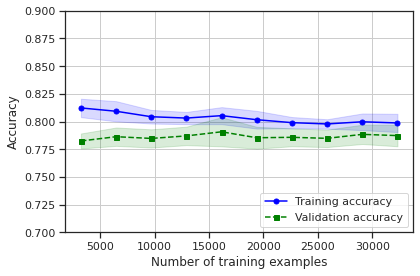

In [33]:
# accuracy plots for Random Forest-1
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores =\
                learning_curve(estimator=pipe1_rf,
                               X=X_train,
                               y=y_train,
                               train_sizes=np.linspace(0.1, 1.0, 10),
                               cv=10,
                               n_jobs=1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean,
         color='blue', marker='o',
         markersize=5, label='Training accuracy')

plt.fill_between(train_sizes,
                 train_mean + train_std,
                 train_mean - train_std,
                 alpha=0.15, color='blue')

plt.plot(train_sizes, test_mean,
         color='green', linestyle='--',
         marker='s', markersize=5,
         label='Validation accuracy')

plt.fill_between(train_sizes,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.15, color='green')

plt.grid()
plt.xlabel('Number of training examples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.7, 0.9])
plt.tight_layout()
plt.show()

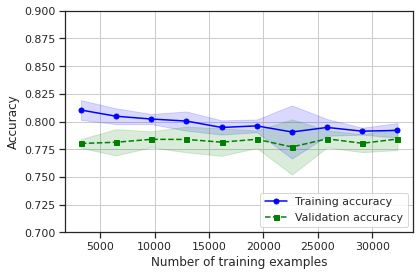

In [34]:
# accuracy plots for Random Forest-2
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores =\
                learning_curve(estimator=pipe2_rf,
                               X=X_train,
                               y=y_train,
                               train_sizes=np.linspace(0.1, 1.0, 10),
                               cv=10,
                               n_jobs=1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean,
         color='blue', marker='o',
         markersize=5, label='Training accuracy')

plt.fill_between(train_sizes,
                 train_mean + train_std,
                 train_mean - train_std,
                 alpha=0.15, color='blue')

plt.plot(train_sizes, test_mean,
         color='green', linestyle='--',
         marker='s', markersize=5,
         label='Validation accuracy')

plt.fill_between(train_sizes,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.15, color='green')

plt.grid()
plt.xlabel('Number of training examples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.7, 0.9])
plt.tight_layout()
plt.show()

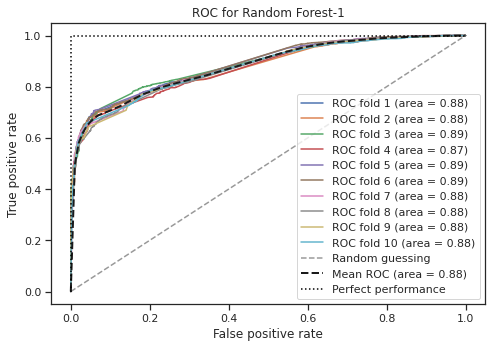

In [35]:
# ROC for Random Forest-1
from sklearn.metrics import roc_curve, auc
from distutils.version import LooseVersion as Version
from scipy import __version__ as scipy_version


if scipy_version >= Version('1.4.1'):
    from numpy import interp
else:
    from scipy import interp
    

cv = list(StratifiedKFold(n_splits=10).split(X_train, y_train))

fig = plt.figure(figsize=(7, 5))

mean_tpr = 0.0
mean_fpr = np.linspace(0, 1, 100)
all_tpr = []

for i, (train, test) in enumerate(cv):
    probas = pipe1_rf.fit(X_train[train],
                         y_train[train]).predict_proba(X_train[test])

    fpr, tpr, thresholds = roc_curve(y_train[test],
                                     probas[:, 1],
                                     pos_label=1)
    mean_tpr += interp(mean_fpr, fpr, tpr)
    mean_tpr[0] = 0.0
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr,
             tpr,
             label='ROC fold %d (area = %0.2f)'
                   % (i+1, roc_auc))

plt.plot([0, 1],
         [0, 1],
         linestyle='--',
         color=(0.6, 0.6, 0.6),
         label='Random guessing')

mean_tpr /= len(cv)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, 'k--',
         label='Mean ROC (area = %0.2f)' % mean_auc, lw=2)
plt.plot([0, 0, 1],
         [0, 1, 1],
         linestyle=':',
         color='black',
         label='Perfect performance')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend(loc="lower right")
plt.title("ROC for Random Forest-1")

plt.tight_layout()
# plt.savefig('images/06_10.png', dpi=300)
plt.show()

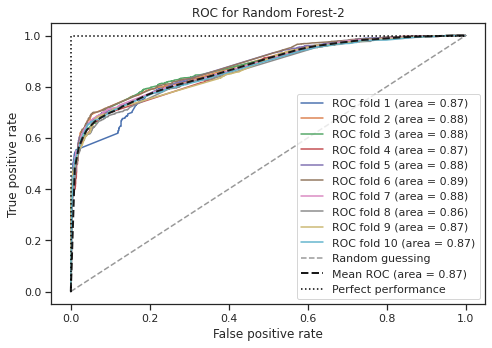

In [36]:
# ROC for Random Forest-2
from sklearn.metrics import roc_curve, auc
from distutils.version import LooseVersion as Version
from scipy import __version__ as scipy_version


if scipy_version >= Version('1.4.1'):
    from numpy import interp
else:
    from scipy import interp
    

cv = list(StratifiedKFold(n_splits=10).split(X_train, y_train))

fig = plt.figure(figsize=(7, 5))

mean_tpr = 0.0
mean_fpr = np.linspace(0, 1, 100)
all_tpr = []

for i, (train, test) in enumerate(cv):
    probas = pipe2_rf.fit(X_train[train],
                         y_train[train]).predict_proba(X_train[test])

    fpr, tpr, thresholds = roc_curve(y_train[test],
                                     probas[:, 1],
                                     pos_label=1)
    mean_tpr += interp(mean_fpr, fpr, tpr)
    mean_tpr[0] = 0.0
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr,
             tpr,
             label='ROC fold %d (area = %0.2f)'
                   % (i+1, roc_auc))

plt.plot([0, 1],
         [0, 1],
         linestyle='--',
         color=(0.6, 0.6, 0.6),
         label='Random guessing')

mean_tpr /= len(cv)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, 'k--',
         label='Mean ROC (area = %0.2f)' % mean_auc, lw=2)
plt.plot([0, 0, 1],
         [0, 1, 1],
         linestyle=':',
         color='black',
         label='Perfect performance')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend(loc="lower right")
plt.title("ROC for Random Forest-2")

plt.tight_layout()
plt.show()

In [37]:
# Neural Network Pipeline
# hyper parameter learning rate (alpha) will be compared in two version of NN
# 1st NN classifier will have alpha = 1e-5 and 2nd one will have alpha = 0.1
pipe1_nn = make_pipeline(StandardScaler(),
                        PCA(n_components=2),
                        MLPClassifier(solver='lbfgs', alpha=1e-5,
                        hidden_layer_sizes=(10, 2), random_state=0))
pipe1_nn.fit(X_train, y_train)
y_pred1 = pipe1_nn.predict(X_test)

pipe2_nn = make_pipeline(StandardScaler(),
                        PCA(n_components=2),
                        MLPClassifier(solver='lbfgs', alpha=0.1,
                        hidden_layer_sizes=(10, 2), random_state=0))
pipe2_nn.fit(X_train, y_train)
y_pred2 = pipe2_nn.predict(X_test)



print('Test Accuracy of 1st neural network is: %.3f' % pipe1_nn.score(X_test, y_test))
print('Test Accuracy of 1st neural network is: %.3f' % pipe2_nn.score(X_test, y_test))



Test Accuracy of 1st neural network is: 0.790
Test Accuracy of 1st neural network is: 0.777


In [38]:
# cross validation scores for neural network classifiers

from sklearn.model_selection import cross_val_score

scores1 = cross_val_score(estimator=pipe1_nn,
                         X=X_train,
                         y=y_train,
                         cv=3,
                         n_jobs=1)

scores2 = cross_val_score(estimator=pipe2_nn,
                         X=X_train,
                         y=y_train,
                         cv=3,
                         n_jobs=1)
#print('CV accuracy scores: %s' % scores1)
print('Cross Validation accuracy for 1st neural network: %.3f +/- %.3f' % (np.mean(scores1), np.std(scores1)))
#print('CV accuracy scores: %s' % scores2)
print('Cross Validation accuracy for 2nd neural network: %.3f +/- %.3f' % (np.mean(scores2), np.std(scores2)))

Cross Validation accuracy for 1st neural network: 0.778 +/- 0.006
Cross Validation accuracy for 2nd neural network: 0.777 +/- 0.008


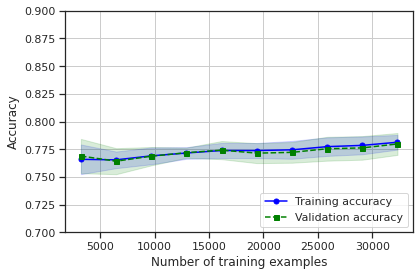

In [39]:
# accuracy plots for Neural Network-1
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores =\
                learning_curve(estimator=pipe1_nn,
                               X=X_train,
                               y=y_train,
                               train_sizes=np.linspace(0.1, 1.0, 10),
                               cv=10,
                               n_jobs=1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean,
         color='blue', marker='o',
         markersize=5, label='Training accuracy')

plt.fill_between(train_sizes,
                 train_mean + train_std,
                 train_mean - train_std,
                 alpha=0.15, color='blue')

plt.plot(train_sizes, test_mean,
         color='green', linestyle='--',
         marker='s', markersize=5,
         label='Validation accuracy')

plt.fill_between(train_sizes,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.15, color='green')

plt.grid()
plt.xlabel('Number of training examples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.7, 0.9])
plt.tight_layout()
plt.show()

In [40]:
import warnings
warnings.filterwarnings('ignore')


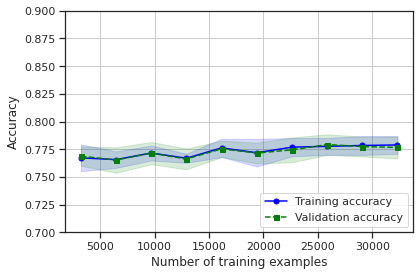

In [41]:
# accuracy plots for Neural Network-1
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores =\
                learning_curve(estimator=pipe1_nn,
                               X=X_train,
                               y=y_train,
                               train_sizes=np.linspace(0.1, 1.0, 10),
                               cv=10,
                               n_jobs=1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean,
         color='blue', marker='o',
         markersize=5, label='Training accuracy')

plt.fill_between(train_sizes,
                 train_mean + train_std,
                 train_mean - train_std,
                 alpha=0.15, color='blue')

plt.plot(train_sizes, test_mean,
         color='green', linestyle='--',
         marker='s', markersize=5,
         label='Validation accuracy')

plt.fill_between(train_sizes,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.15, color='green')

plt.grid()
plt.xlabel('Number of training examples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.7, 0.9])
plt.tight_layout()
plt.show()

In [42]:
import warnings
warnings.filterwarnings('ignore')


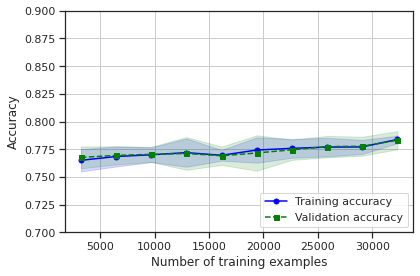

In [43]:
# accuracy plots for Neural Network-2
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores =\
                learning_curve(estimator=pipe2_nn,
                               X=X_train,
                               y=y_train,
                               train_sizes=np.linspace(0.1, 1.0, 10),
                               cv=10,
                               n_jobs=1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean,
         color='blue', marker='o',
         markersize=5, label='Training accuracy')

plt.fill_between(train_sizes,
                 train_mean + train_std,
                 train_mean - train_std,
                 alpha=0.15, color='blue')

plt.plot(train_sizes, test_mean,
         color='green', linestyle='--',
         marker='s', markersize=5,
         label='Validation accuracy')

plt.fill_between(train_sizes,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.15, color='green')

plt.grid()
plt.xlabel('Number of training examples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.7, 0.9])
plt.tight_layout()
plt.show()

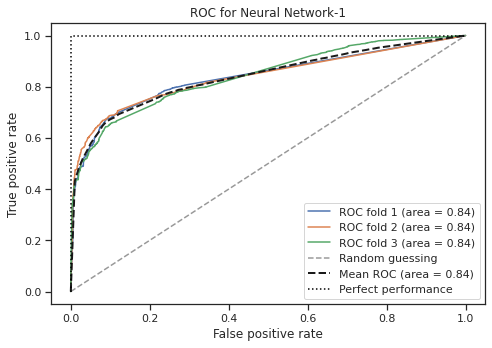

In [44]:
# ROC for Neural Network-1
from sklearn.metrics import roc_curve, auc
from distutils.version import LooseVersion as Version
from scipy import __version__ as scipy_version


if scipy_version >= Version('1.4.1'):
    from numpy import interp
else:
    from scipy import interp


#X_train2 = X_train[:, [4, 14]]
    

cv = list(StratifiedKFold(n_splits=3).split(X_train, y_train))

fig = plt.figure(figsize=(7, 5))

mean_tpr = 0.0
mean_fpr = np.linspace(0, 1, 100)
all_tpr = []

for i, (train, test) in enumerate(cv):
    probas = pipe1_nn.fit(X_train[train],
                         y_train[train]).predict_proba(X_train[test])

    fpr, tpr, thresholds = roc_curve(y_train[test],
                                     probas[:, 1],
                                     pos_label=1)
    mean_tpr += interp(mean_fpr, fpr, tpr)
    mean_tpr[0] = 0.0
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr,
             tpr,
             label='ROC fold %d (area = %0.2f)'
                   % (i+1, roc_auc))

plt.plot([0, 1],
         [0, 1],
         linestyle='--',
         color=(0.6, 0.6, 0.6),
         label='Random guessing')

mean_tpr /= len(cv)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, 'k--',
         label='Mean ROC (area = %0.2f)' % mean_auc, lw=2)
plt.plot([0, 0, 1],
         [0, 1, 1],
         linestyle=':',
         color='black',
         label='Perfect performance')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend(loc="lower right")
plt.title("ROC for Neural Network-1")

plt.tight_layout()
# plt.savefig('images/06_10.png', dpi=300)
plt.show()

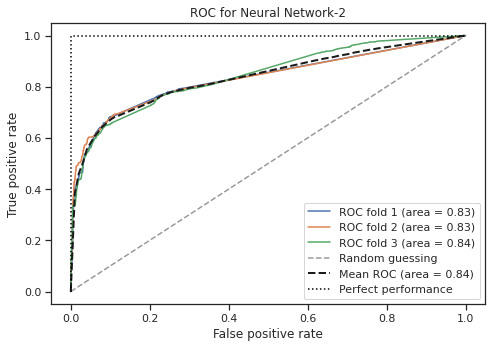

In [45]:
# ROC for Neural Network-2
from sklearn.metrics import roc_curve, auc
from distutils.version import LooseVersion as Version
from scipy import __version__ as scipy_version


if scipy_version >= Version('1.4.1'):
    from numpy import interp
else:
    from scipy import interp


#X_train2 = X_train[:, [4, 14]]
    

cv = list(StratifiedKFold(n_splits=3).split(X_train, y_train))

fig = plt.figure(figsize=(7, 5))

mean_tpr = 0.0
mean_fpr = np.linspace(0, 1, 100)
all_tpr = []

for i, (train, test) in enumerate(cv):
    probas = pipe2_nn.fit(X_train[train],
                         y_train[train]).predict_proba(X_train[test])

    fpr, tpr, thresholds = roc_curve(y_train[test],
                                     probas[:, 1],
                                     pos_label=1)
    mean_tpr += interp(mean_fpr, fpr, tpr)
    mean_tpr[0] = 0.0
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr,
             tpr,
             label='ROC fold %d (area = %0.2f)'
                   % (i+1, roc_auc))

plt.plot([0, 1],
         [0, 1],
         linestyle='--',
         color=(0.6, 0.6, 0.6),
         label='Random guessing')

mean_tpr /= len(cv)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, 'k--',
         label='Mean ROC (area = %0.2f)' % mean_auc, lw=2)
plt.plot([0, 0, 1],
         [0, 1, 1],
         linestyle=':',
         color='black',
         label='Perfect performance')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend(loc="lower right")
plt.title("ROC for Neural Network-2")

plt.tight_layout()
# plt.savefig('images/06_10.png', dpi=300)
plt.show()

** Question: 2**
I would expect a ROC plot to go up vertical and plateau out for almost all values of x axis. This means that a model predicts true values for all new data and very very less false predictions. In simpler terms, an ideal ROC will show that the the true positive rate is almost 100% and false positive rate is close to 0

All my 6 ROCs did show the correct trend but none of them were above 90% (ROC-AREA)

** Question: 3 **

Following are the mean ROC area for three classifiers and two variations of each: 

Neural Network
NN-2: 0.83
NN-1: 0.84

Random Forest
RF-2: 0.87
RF-1: 0.88

Decision Tree
DF-2: 0.85
DF-1: 0.83

Based on MEAN ROC area under curve, I will use RF-1 because it will have 88% 
chance of being correct


** Applying Random Forest-1 classifier upon adding text column to features**

In [46]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words='english', max_features=50 )
vec_text = vectorizer.fit_transform(df3['text'])
vec_text.toarray()

array([[0.        , 0.14236769, 0.        , ..., 0.06227748, 0.        ,
        0.18582207],
       [0.        , 0.66314215, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.12636455, 0.        , ..., 0.05527704, 0.04901213,
        0.        ],
       ...,
       [0.06029118, 0.06591061, 0.0646075 , ..., 0.        , 0.02556429,
        0.17205652],
       [0.        , 0.        , 0.49397319, ..., 0.        , 0.09772914,
        0.        ],
       [0.49983577, 0.        , 0.        , ..., 0.09561112, 0.08477488,
        0.        ]])

In [47]:
# converting the vec_text(vectorized object) into a dataframe
df_text = pd.DataFrame(vec_text.toarray(), columns = vectorizer.get_feature_names_out())
df_text.head()

,according,administration,america,american,campaign,clinton,country,court,did,donald,...,states,time,told,trump,twitter,united,washington,white,year,years
0,0.000000,0.142368,0.0,0.000000,0.000000,0.000000,0.060603,0.00000,0.060395,0.048424,...,0.056767,0.000000,0.053517,0.306158,0.072082,0.059386,0.117793,0.062277,0.000000,0.185822
1,0.000000,0.663142,0.0,0.061056,0.000000,0.000000,0.056457,0.29935,0.000000,0.045111,...,0.000000,0.103328,0.000000,0.407449,0.067151,0.000000,0.164602,0.000000,0.000000,0.000000
2,0.000000,0.126365,0.0,0.000000,0.340431,0.063704,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.049224,0.000000,0.543488,0.000000,0.000000,0.104552,0.055277,0.049012,0.000000
3,0.090000,0.000000,0.0,0.090588,0.441772,0.099202,0.000000,0.00000,0.083477,0.066930,...,0.000000,0.000000,0.073970,0.604522,0.000000,0.000000,0.081405,0.258236,0.076323,0.000000
4,0.311378,0.000000,0.0,0.062682,0.000000,0.000000,0.057960,0.00000,0.000000,0.046312,...,0.108584,0.053039,0.000000,0.292809,0.068939,0.170390,0.168984,0.059562,0.316868,0.000000


In [48]:
df_new = pd.concat([df, df_text], axis=1)
df_new.head()
# end of pre-processing and ready for training and testing

,title,text,subject,date,class,america,anti,attack,black,breaking,...,states,time,told,trump,twitter,united,washington,white,year,years
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",0,0.0,0.0,0.0,0.0,0.0,...,0.056767,0.000000,0.053517,0.306158,0.072082,0.059386,0.117793,0.062277,0.000000,0.185822
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.103328,0.000000,0.407449,0.067151,0.000000,0.164602,0.000000,0.000000,0.000000
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.049224,0.000000,0.543488,0.000000,0.000000,0.104552,0.055277,0.049012,0.000000
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.073970,0.604522,0.000000,0.000000,0.081405,0.258236,0.076323,0.000000
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",0,0.0,0.0,0.0,0.0,0.0,...,0.108584,0.053039,0.000000,0.292809,0.068939,0.170390,0.168984,0.059562,0.316868,0.000000


In [49]:
# setting up X and Y
X_new = df.loc[:, 'america':].values
y_new = df.loc[:, 'class'].values


In [50]:
# splitting up for training and testing
# check on stratification
from sklearn.model_selection import train_test_split

Xnew_train, Xnew_test, ynew_train, ynew_test = \
    train_test_split(X, y, 
                     test_size=0.20,
                     stratify=y,
                     random_state=1)

In [51]:
#pipe1_rf = make_pipeline(StandardScaler(),
                        #PCA(n_components=9),
                        #RandomForestClassifier(n_estimators=100,random_state=1,max_features=3))
pipe1_rf.fit(Xnew_train, ynew_train)
y_pred1 = pipe1_rf.predict(Xnew_test)

print('Test Accuracy of RF1 when text is included: %.3f' % pipe1_rf.score(X_test, y_test))


Test Accuracy of RF1 when text is included: 0.781


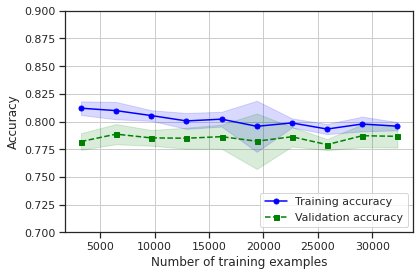

In [52]:
# accuracy plots for Random Forest-1
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores =\
                learning_curve(estimator=pipe1_rf,
                               X=Xnew_train,
                               y=ynew_train,
                               train_sizes=np.linspace(0.1, 1.0, 10),
                               cv=10,
                               n_jobs=1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean,
         color='blue', marker='o',
         markersize=5, label='Training accuracy')

plt.fill_between(train_sizes,
                 train_mean + train_std,
                 train_mean - train_std,
                 alpha=0.15, color='blue')

plt.plot(train_sizes, test_mean,
         color='green', linestyle='--',
         marker='s', markersize=5,
         label='Validation accuracy')

plt.fill_between(train_sizes,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.15, color='green')

plt.grid()
plt.xlabel('Number of training examples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.7, 0.9])
plt.tight_layout()
plt.show()

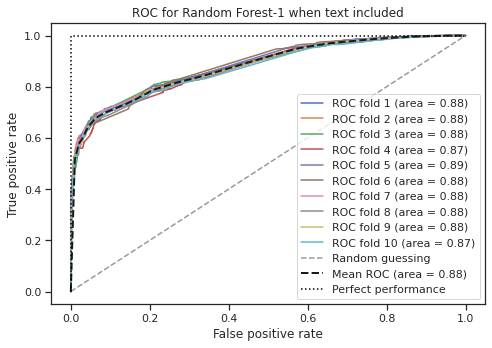

In [53]:
# ROC for Random Forest-1 applied to dataset that includes titles and text

from sklearn.metrics import roc_curve, auc
from distutils.version import LooseVersion as Version
from scipy import __version__ as scipy_version


if scipy_version >= Version('1.4.1'):
    from numpy import interp
else:
    from scipy import interp


cv = list(StratifiedKFold(n_splits=10).split(X_train, y_train))

fig = plt.figure(figsize=(7, 5))

mean_tpr = 0.0
mean_fpr = np.linspace(0, 1, 100)
all_tpr = []

for i, (train, test) in enumerate(cv):
    probas = pipe1_rf.fit(Xnew_train[train],
                         ynew_train[train]).predict_proba(Xnew_train[test])

    fpr, tpr, thresholds = roc_curve(y_train[test],
                                     probas[:, 1],
                                     pos_label=1)
    mean_tpr += interp(mean_fpr, fpr, tpr)
    mean_tpr[0] = 0.0
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr,
             tpr,
             label='ROC fold %d (area = %0.2f)'
                   % (i+1, roc_auc))

plt.plot([0, 1],
         [0, 1],
         linestyle='--',
         color=(0.6, 0.6, 0.6),
         label='Random guessing')

mean_tpr /= len(cv)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, 'k--',
         label='Mean ROC (area = %0.2f)' % mean_auc, lw=2)
plt.plot([0, 0, 1],
         [0, 1, 1],
         linestyle=':',
         color='black',
         label='Perfect performance')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend(loc="lower right")
plt.title("ROC for Random Forest-1 when text included")

plt.tight_layout()
# plt.savefig('images/06_10.png', dpi=300)
plt.show()